In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datadir = './'
datafile = os.path.join(datadir, '20160721_082911 Stareso.csv')

## Create profile object

In [53]:
class CTDprofile(object):
    
    def __init__(self, filename, varnames=None, varunits=None, varvalues=None):
        self.filename = filename
        self.varnames = varnames
        self.varunits = varunits
        self.varvalues = varvalues
        
    def read_from(self):
        """Read the profile (variable names, units and values) from the file
        """
        with open(self.filename, 'r') as f:
            
            self.varnames = []
            self.varunits = {}
            self.varprofile = {}
            
            # Read 1st line
            line = f.readline()
            
            # Read comment lines (metadata)
            while line[0] == '%':
                line = f.readline().rstrip('\n')
                
            # Extract variable names and units 
            for ii in line.split(','):
                m = re.search(r'(\w+) \((.+)\)', ii)
                if m:
                    self.varnames.append(m.group(1))
                    self.varunits[m.group(1)] = m.group(2)
                    
            nvars = len(varnames)
            
            # Create dictionnary of variable profiles:
            # Key = variable name
            # Value = list of measured value
            for i in range(0, nvars):
                self.varprofile[self.varnames[i]] = []

            line = f.readline().rstrip('\n')
            while line:
                for i in range(0, nvars):
                    self.varprofile[self.varnames[i]].append(float(line.split(',')[i]))
                line = f.readline().rstrip('\n')
                
    def make_plot(self, varname1, varname2):
        fig = plt.figure()
        plt.plot(self.varprofile[varname1], self.varprofile[varname2])
        plt.xlabel(varname1)
        plt.ylabel(varname2)
        plt.show()

In [54]:
Profile = CTDprofile(datafile)
Profile.read_from()
Profile.varnames

['Pressure', 'Depth', 'Temperature', 'Conductivity', 'Salinity', 'Density']

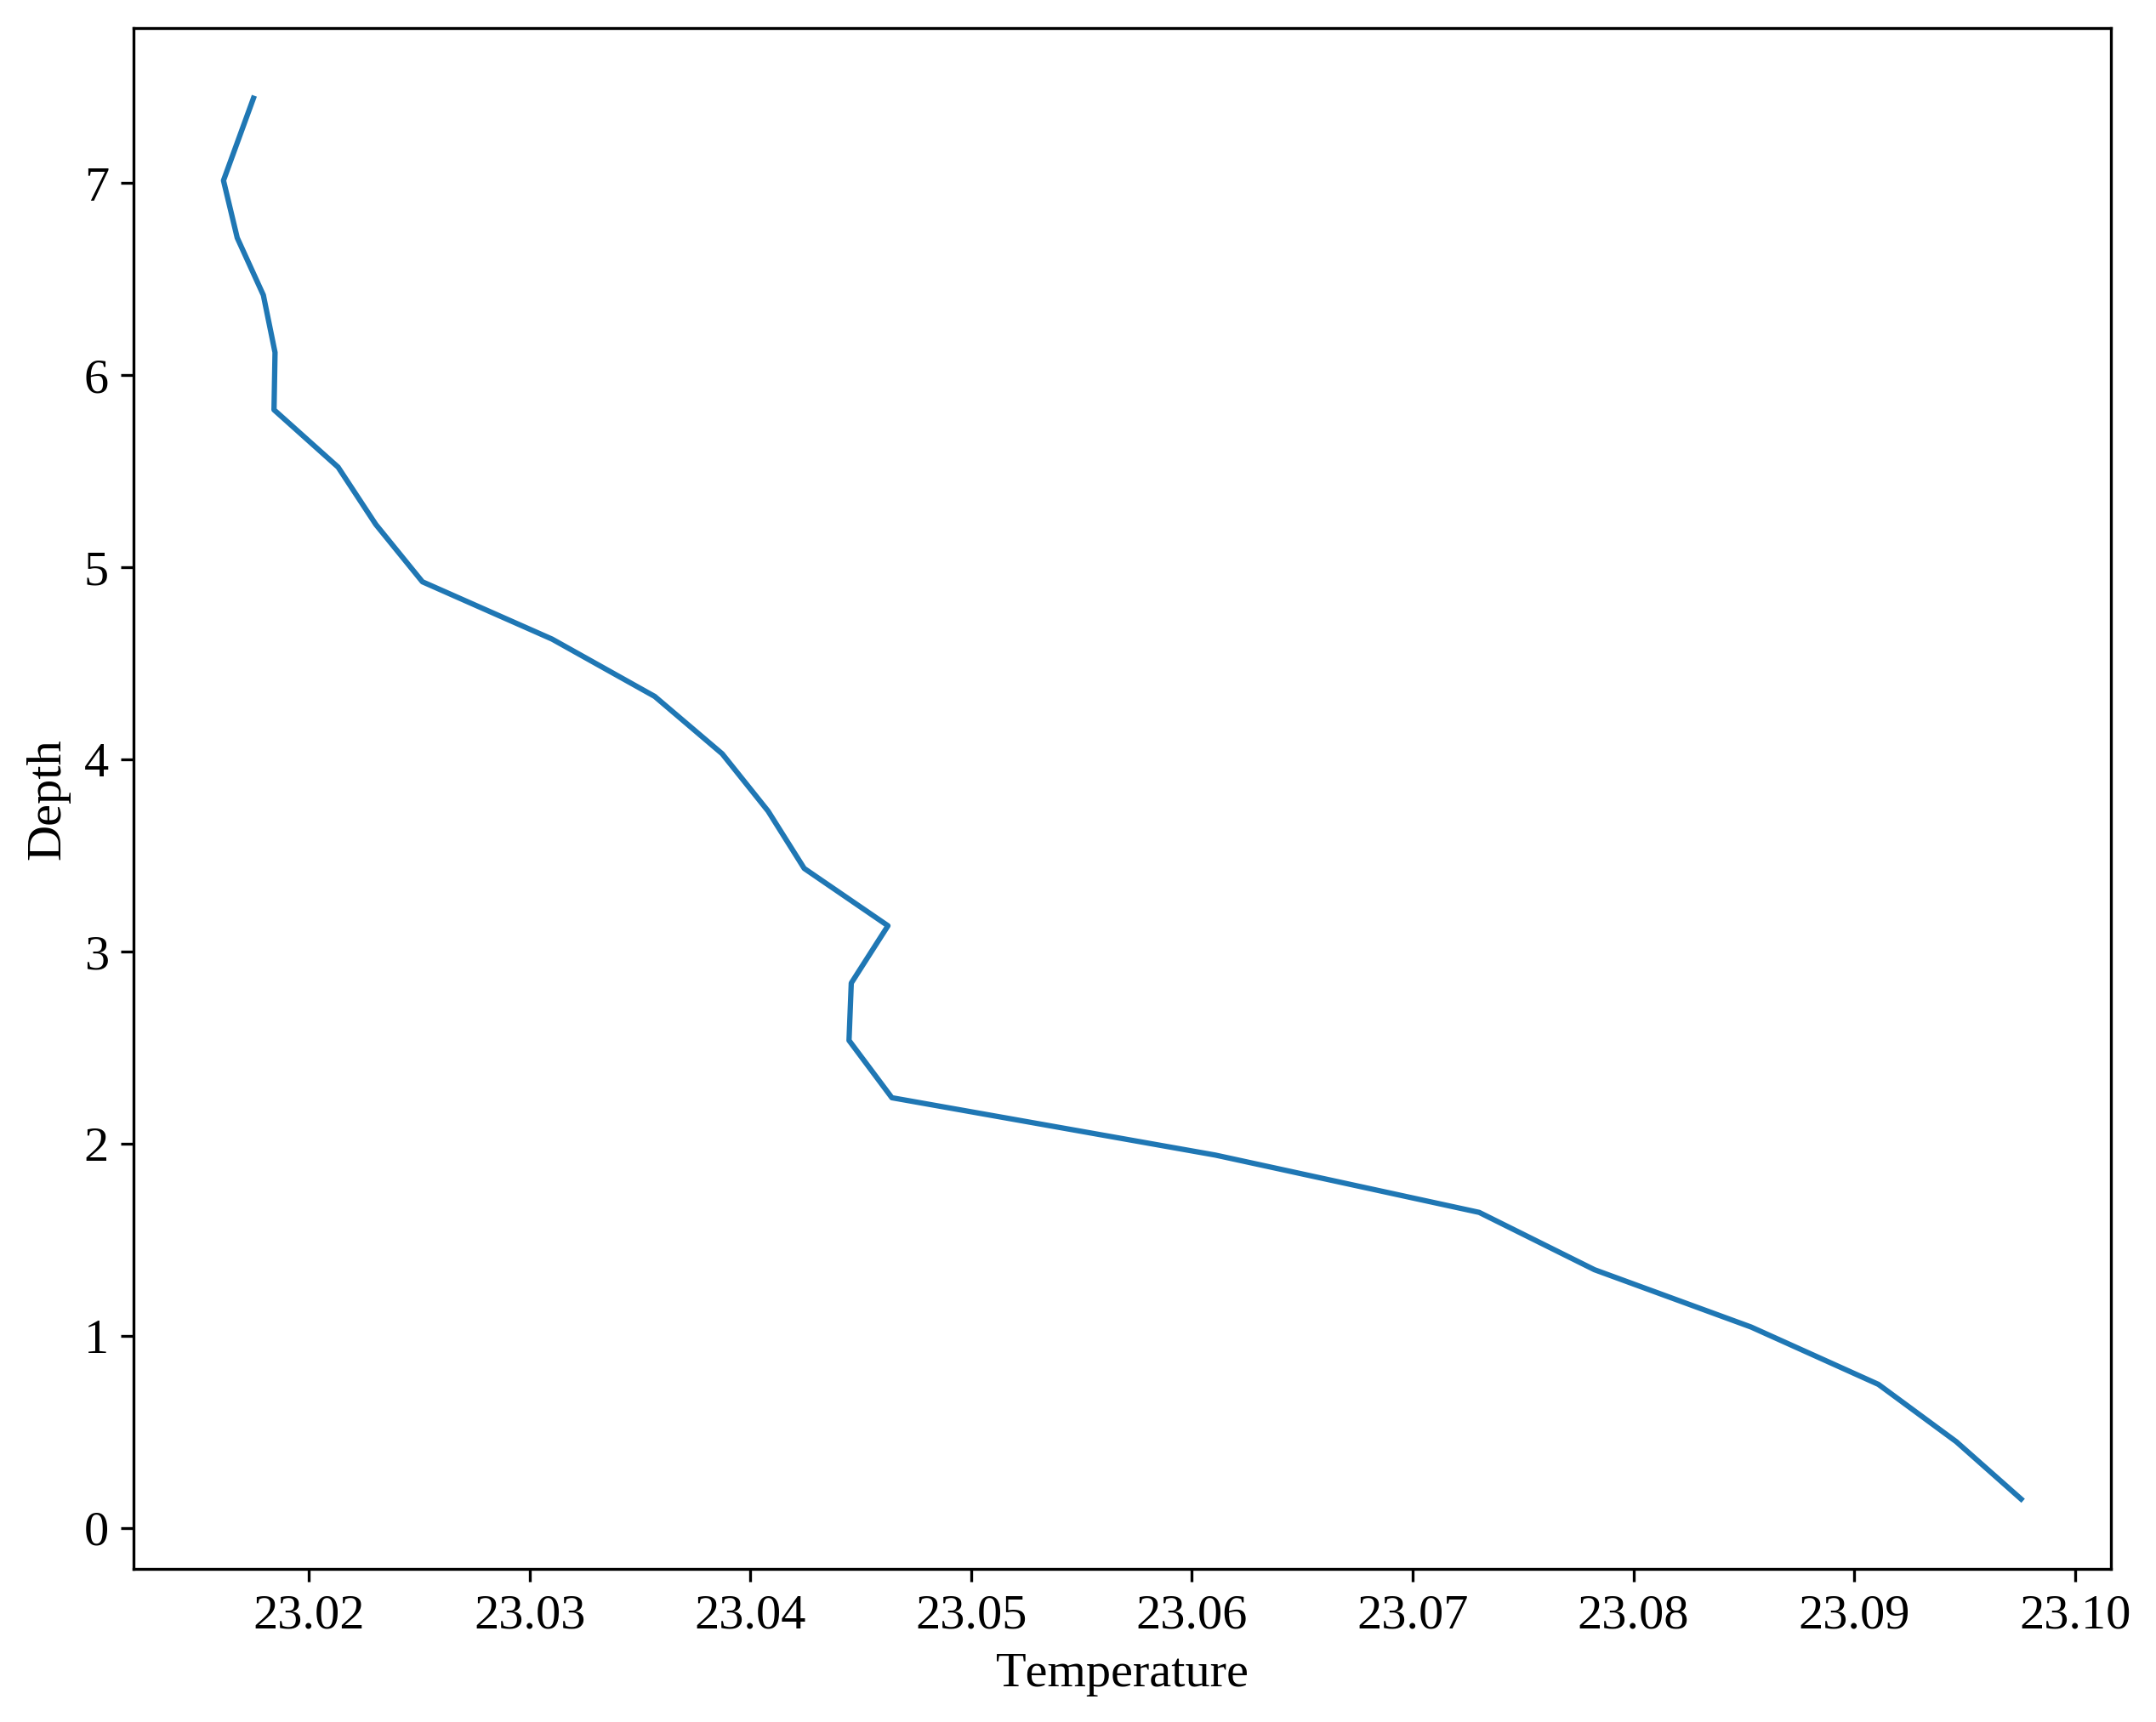

In [55]:
Profile.make_plot('Temperature', 'Depth')